# Importing libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Define the path
path = "/Users/ol/anaconda_projects/2025_02 World University Rankings/02 Data/Prepared Data/df_times.csv"

# Import CSV
df = pd.read_csv(path)
df.head()

world_rank                            institution country  teaching  \
0         1.0                     Harvard University     USA      99.7   
1         2.0     California Institute of Technology     USA      97.7   
2         3.0  Massachusetts Institute of Technology     USA      97.8   
3         4.0                    Stanford University     USA      98.3   
4         5.0                   Princeton University     USA      90.9   

  international  research  citations income  students  student_staff  \
0          72.4      98.7       98.8   34.5    20.152            8.9   
1          54.6      98.0       99.9   83.7     2.243            6.9   
2          82.3      91.4       99.9   87.5    11.074            9.0   
3          29.5      98.1       99.2   64.3    15.596            7.8   
4          70.3      95.4       99.9      -     7.929            8.4   

   international_percent  year  score  female_ratio  male_ratio  
0                   25.0  2011   96.1          52.0        48.0  
1                   27.0  2011   96.0          33.0        67.0  
2                   33.0  2011   95.6          37.0        63.0  
3                   22.0  2011   94.3          42.0        58.0  
4                   27.0  2011   94.2          45.0        55.0

# Time-series analysis

In [35]:
# Select 5 universities
uni1 = "Harvard University"
uni2 = "California Institute of Technology"
uni3 = "Massachusetts Institute of Technology"
uni4 = "Stanford University"
uni5 = "Princeton University"

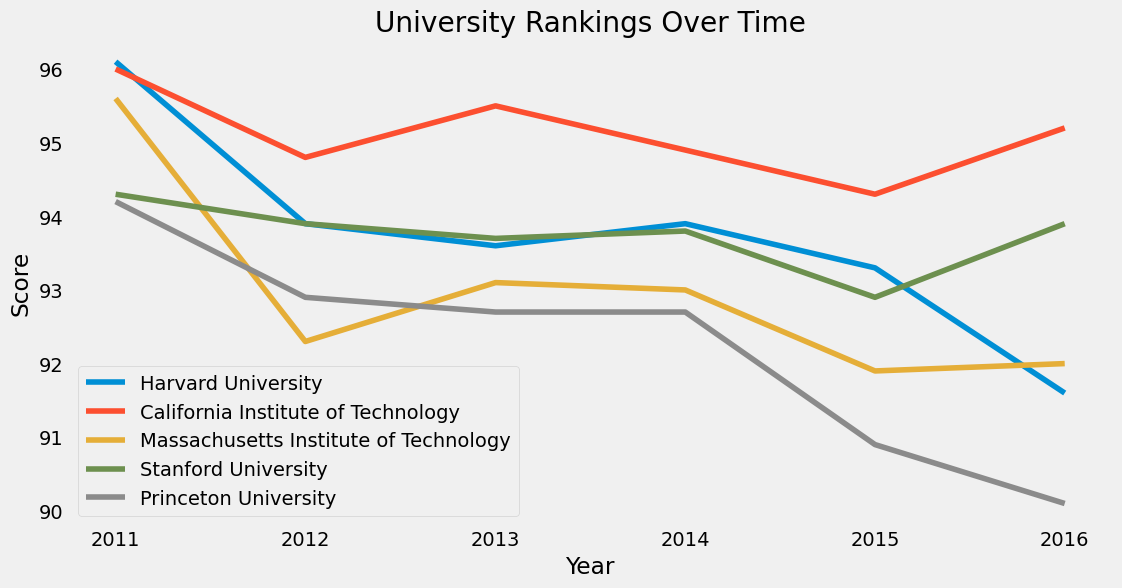

In [37]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot each university's score over time
plt.plot(df[df['institution'] == uni1].index, df[df['institution'] == uni1]['score'], label=uni1)
plt.plot(df[df['institution'] == uni2].index, df[df['institution'] == uni2]['score'], label=uni2)
plt.plot(df[df['institution'] == uni3].index, df[df['institution'] == uni3]['score'], label=uni3)
plt.plot(df[df['institution'] == uni4].index, df[df['institution'] == uni4]['score'], label=uni4)
plt.plot(df[df['institution'] == uni5].index, df[df['institution'] == uni5]['score'], label=uni5)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("University Rankings Over Time")

# Add legend and grid
plt.legend()
plt.grid()

# Show the graph
plt.show()

## Decomposition

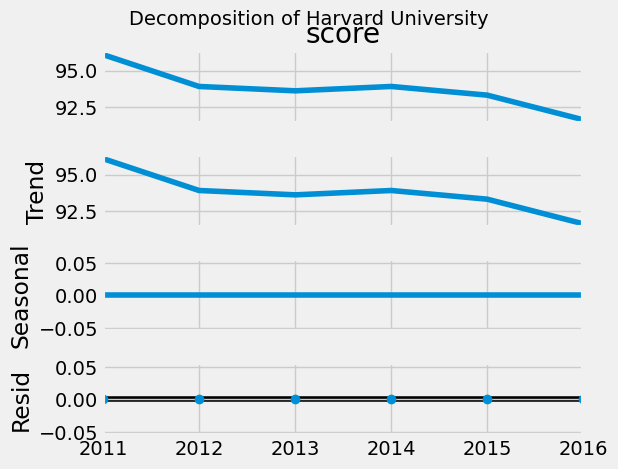

In [45]:
# Decomposition Harvard
harvard = df[df['institution'] == uni1]

# Perform decomposition
decomposition = seasonal_decompose(harvard['score'], model='additive', period=1)

# Plot decomposition
decomposition.plot()
plt.suptitle(f"Decomposition of {uni1}", fontsize=14)
plt.show()

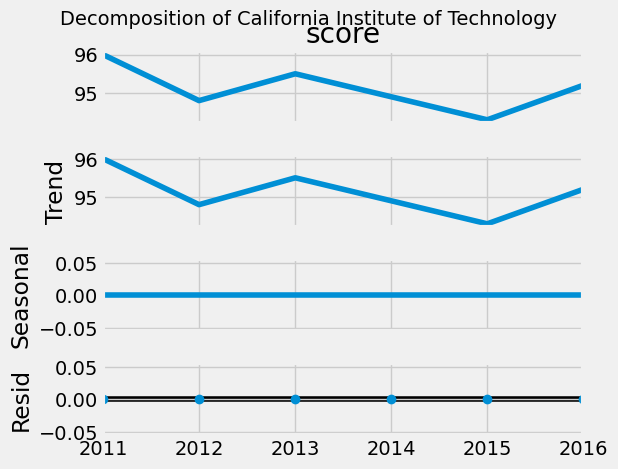

In [49]:
# Decomposition California Institute of Technology
cit = df[df['institution'] == uni2]

# Perform decomposition
decomposition = seasonal_decompose(cit['score'], model='additive', period=1)

# Plot decomposition
decomposition.plot()
plt.suptitle(f"Decomposition of {uni2}", fontsize=14)
plt.show()

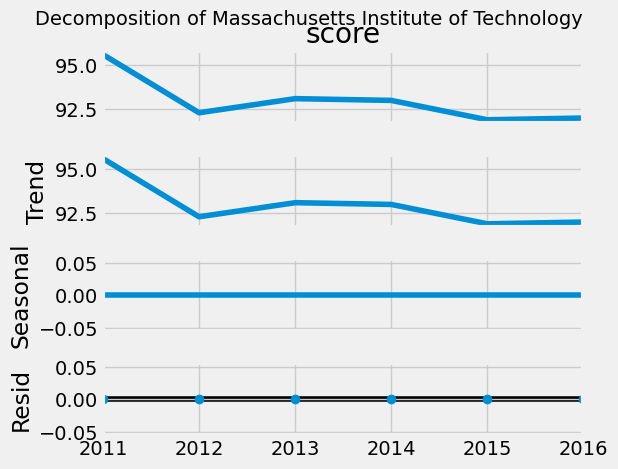

In [51]:
# Decomposition California Institute of Technology
mit = df[df['institution'] == uni3]

# Perform decomposition
decomposition = seasonal_decompose(mit['score'], model='additive', period=1)

# Plot decomposition
decomposition.plot()
plt.suptitle(f"Decomposition of {uni3}", fontsize=14)
plt.show()

In [55]:
# Decomposition Stanford University
stanford = df[df['institution'] == uni4]

# Perform decomposition
decomposition = seasonal_decompose(stanford['score'], model='additive', period=1)

# Plot decomposition
decomposition.plot()
plt.suptitle(f"Decomposition of {uni4}", fontsize=14)
plt.show()

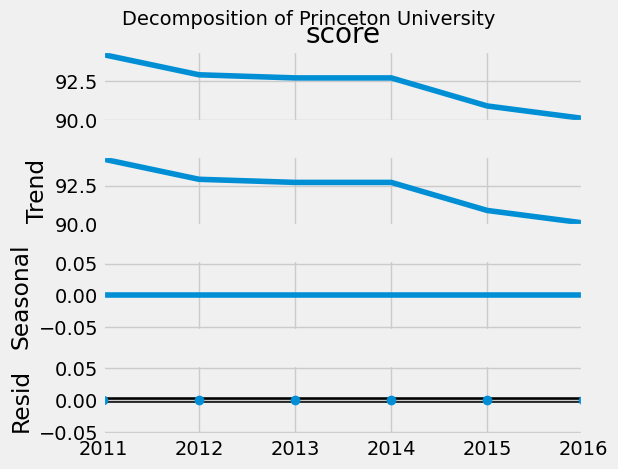

In [57]:
# Decomposition Harvard
princeton = df[df['institution'] == uni5]

# Perform decomposition
decomposition = seasonal_decompose(princeton['score'], model='additive', period=1)

# Plot decomposition
decomposition.plot()
plt.suptitle(f"Decomposition of {uni5}", fontsize=14)
plt.show()

## Testing for stationarity

In [64]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Dickey-Fuller stationarity test
def dickey_fuller(timeseries, university):
    print(f'Dickey-Fuller Test for {university}:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)
    print("\n" + "="*40 + "\n")

# List of top 5 universities
top_universities = ["Harvard University", "California Institute of Technology",
                    "Massachusetts Institute of Technology", "Stanford University", "Princeton University"]

# Apply stationarity test for each university
for uni in top_universities:
    uni_df = df[df['institution'] == uni]
    
    if len(uni_df) < 2:  
        print(f"Not enough data for {uni}, skipping stationarity test.\n")
        continue

    dickey_fuller(uni_df['score'], uni)

Dickey-Fuller Test for Harvard University:
Test Statistic         -1.296951
p-value                 0.630566
Lags Used               0.000000
Observations Used       5.000000
Critical Value (1%)    -6.045114
Critical Value (5%)    -3.929280
Critical Value (10%)   -2.986810
dtype: float64


Dickey-Fuller Test for California Institute of Technology:
Test Statistic         -3.285645
p-value                 0.015532
Lags Used               0.000000
Observations Used       5.000000
Critical Value (1%)    -6.045114
Critical Value (5%)    -3.929280
Critical Value (10%)   -2.986810
dtype: float64


Dickey-Fuller Test for Massachusetts Institute of Technology:
Test Statistic         -4.645711
p-value                 0.000106
Lags Used               0.000000
Observations Used       5.000000
Critical Value (1%)    -6.045114
Critical Value (5%)    -3.929280
Critical Value (10%)   -2.986810
dtype: float64


Dickey-Fuller Test for Stanford University:
Test Statistic         -0.503655
p-value        

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

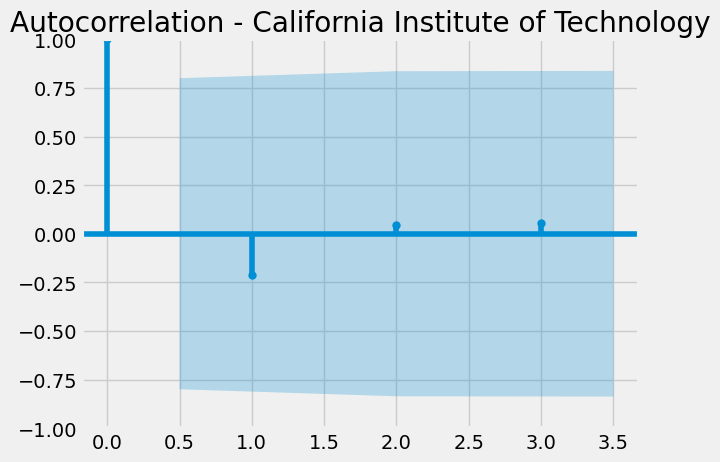

<Figure size 640x480 with 0 Axes>

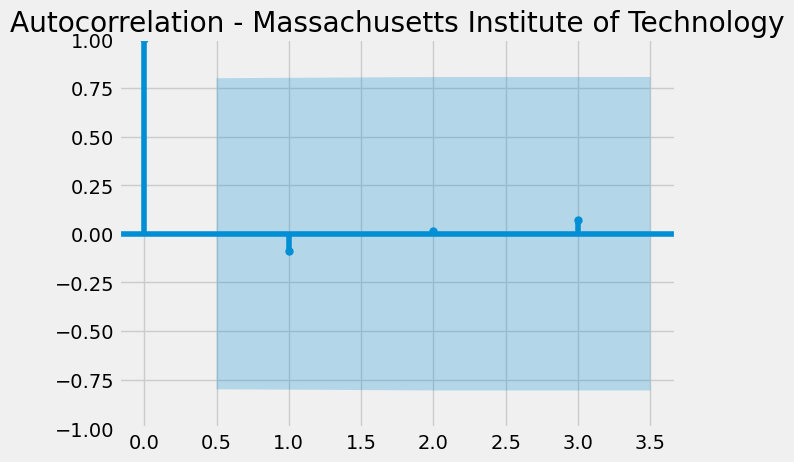

<Figure size 640x480 with 0 Axes>

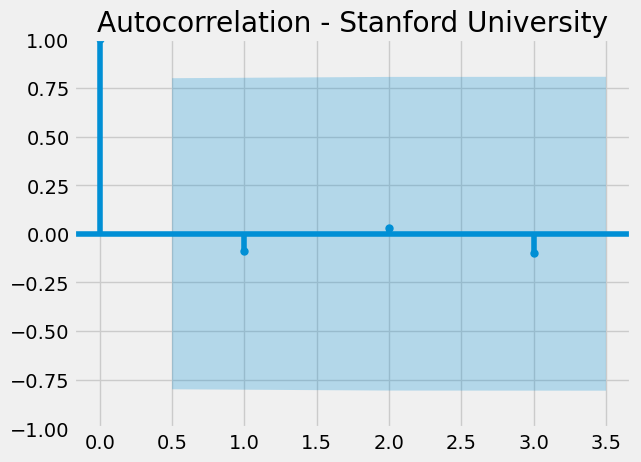

<Figure size 640x480 with 0 Axes>

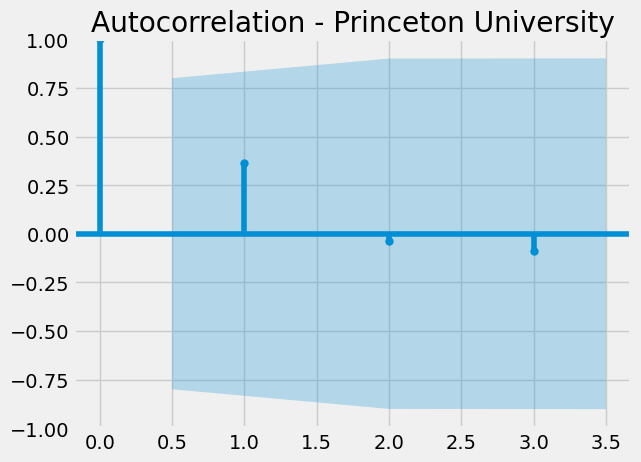

In [92]:
# Plot Autocorrelation for each university
for uni in top_universities:
    uni_df = df[df['institution'] == uni].copy()
    
    # Plot Autocorrelation
    plt.figure()
    plot_acf(uni_df['score'])
    plt.title(f"Autocorrelation - {uni}")
    plt.show()